In [1]:
#understanding the dataset

In [3]:
import pandas as pd

In [5]:
data = {
    "ID": [1, 2, 3, 4, 5, 6],
    "Area (sq ft)": [1500, 2000, 1200, 1800, 2200, 1300],
    "Bedrooms": [3, 4, 2, 3, 4, 2],
    "Age (years)": [10, 5, 20, 15, 2, 30],
    "Location": ["Suburb", "Urban", "Rural", "Suburb", "Urban", "Rural"],
    "Price": [300000, 450000, 180000, 320000, 500000, 150000]
}


In [11]:
df=pd.DataFrame(data)
df

,ID,Area (sq ft),Bedrooms,Age (years),Location,Price
0,1,1500,3,10,Suburb,300000
1,2,2000,4,5,Urban,450000
2,3,1200,2,20,Rural,180000
3,4,1800,3,15,Suburb,320000
4,5,2200,4,2,Urban,500000
5,6,1300,2,30,Rural,150000


In [13]:
#initial exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            6 non-null      int64 
 1   Area (sq ft)  6 non-null      int64 
 2   Bedrooms      6 non-null      int64 
 3   Age (years)   6 non-null      int64 
 4   Location      6 non-null      object
 5   Price         6 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 420.0+ bytes


In [15]:
df.isnull().sum()

ID              0
Area (sq ft)    0
Bedrooms        0
Age (years)     0
Location        0
Price           0
dtype: int64

In [17]:
df.describe()

,ID,Area (sq ft),Bedrooms,Age (years),Price
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.500000,1666.666667,3.000000,13.666667,316666.666667
std,1.870829,398.329847,0.894427,10.327956,140095.205723
min,1.000000,1200.000000,2.000000,2.000000,150000.000000
25%,2.250000,1350.000000,2.250000,6.250000,210000.000000
50%,3.500000,1650.000000,3.000000,12.500000,310000.000000
75%,4.750000,1950.000000,3.750000,18.750000,417500.000000
max,6.000000,2200.000000,4.000000,30.000000,500000.000000


# Basic feature engineering

### Encoding categorical variables

Convert categorical variables (like Location) into numerical values.

In [22]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [24]:
df

,ID,Area (sq ft),Bedrooms,Age (years),Price,Location_Suburb,Location_Urban
0,1,1500,3,10,300000,True,False
1,2,2000,4,5,450000,False,True
2,3,1200,2,20,180000,False,False
3,4,1800,3,15,320000,True,False
4,5,2200,4,2,500000,False,True
5,6,1300,2,30,150000,False,False


### Feature scaling 

Normalize or standardize numerical features to ensure they are on the same scale.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Area (sq ft)', 'Age (years)']] = scaler.fit_transform(df[['Area (sq ft)', 'Age (years)']])
df

,ID,Area (sq ft),Bedrooms,Age (years),Price,Location_Suburb,Location_Urban
0,1,-0.458349,3,-0.388909,300000,True,False
1,2,0.916698,4,-0.919239,450000,False,True
2,3,-1.283378,2,0.671751,180000,False,False
3,4,0.366679,3,0.141421,320000,True,False
4,5,1.466718,4,-1.237437,500000,False,True
5,6,-1.008368,2,1.732412,150000,False,False


### creating new features 

Derive new features based on existing ones. For example, you can create a new feature that represents the Area per Bedroom.

In [46]:
df['Area per Bedroom'] = df['Area (sq ft)'] / df['Bedrooms']
df

,ID,Area (sq ft),Bedrooms,Age (years),Price,Location_Suburb,Location_Urban,Area per Bedroom
0,1,-0.458349,3,-0.388909,300000,True,False,-0.152783
1,2,0.916698,4,-0.919239,450000,False,True,0.229175
2,3,-1.283378,2,0.671751,180000,False,False,-0.641689
3,4,0.366679,3,0.141421,320000,True,False,0.122226
4,5,1.466718,4,-1.237437,500000,False,True,0.366679
5,6,-1.008368,2,1.732412,150000,False,False,-0.504184


###  handling outliers

Identify and treat outliers that may skew the results. You can use methods like Z-score or IQR to detect and remove or cap outliers.

In [56]:
# Example: Removing outliers based on Z-score
import numpy as np
from scipy import stats

df = df[(np.abs(stats.zscore(df[['Area (sq ft)', 'Age (years)', 'Price']])) < 3).all(axis=1)]
df

,ID,Area (sq ft),Bedrooms,Age (years),Price,Location_Suburb,Location_Urban,Area per Bedroom
0,1,-0.458349,3,-0.388909,300000,True,False,-0.152783
1,2,0.916698,4,-0.919239,450000,False,True,0.229175
2,3,-1.283378,2,0.671751,180000,False,False,-0.641689
3,4,0.366679,3,0.141421,320000,True,False,0.122226
4,5,1.466718,4,-1.237437,500000,False,True,0.366679
5,6,-1.008368,2,1.732412,150000,False,False,-0.504184


### feature selection 

After creating features, you should evaluate their importance. You can use correlation matrices or machine learning techniques to determine which features contribute most to the target variable (e.g., Price).

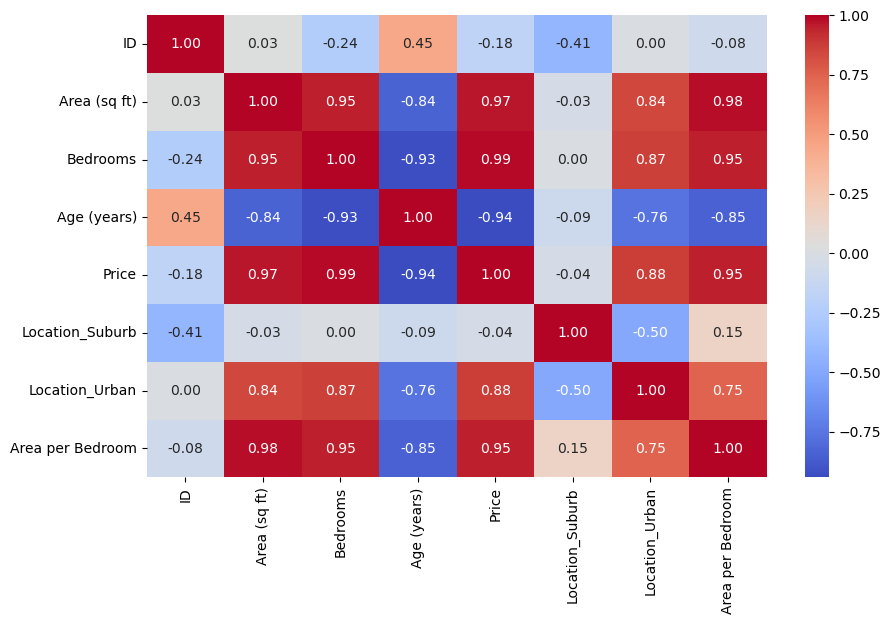

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


### building and evaluating the model 

With the engineered features, you can build a predictive model. For example, using linear regression to predict house prices:

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the dataset
X = df.drop(['ID', 'Price'], axis=1)  # Features
y = df['Price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
predictions = model.predict(X_test)


Feature engineering is an iterative process. You may need to revisit earlier steps based on model performance. Always validate your findings with domain knowledge and statistical tests to ensure that the features make sense in the context of the problem you're solving.

In this example, we walked through a hypothetical house pricing dataset, applying various feature engineering techniques such as encoding categorical variables, scaling numerical features, creating new features, and selecting the most relevant features for modeling.

Feel free to modify the dataset and the techniques according to your project’s specific requirements! If you have any specific questions or need further clarification on any of these steps, let me know!